# Import Package

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import cohen_kappa_score

# Data Exploration

In [3]:
df = pd.read_csv('archive/jm1.csv')

# Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [5]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [6]:
##something is wrong, those last five that start with uniq_Op are objects - 
df['uniq_Op'] = pd.to_numeric(df['uniq_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['uniq_Opnd'] = pd.to_numeric(df['uniq_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['branchCount'] = pd.to_numeric(df['branchCount'], errors='coerce') ## convert to number, make NaNs from ?s 
df['defects'] = df['defects'].astype(int)

df = df.dropna()
df = df.reset_index(drop=True)

# Data Visualization

<AxesSubplot:xlabel='defects', ylabel='count'>

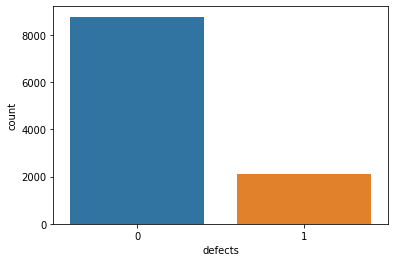

In [7]:
import seaborn as sns
sns.countplot(x="defects", data = df)

# Feature Selection

In [8]:
from sklearn import model_selection

# Split-out validation dataset
X = df.iloc[:, 0:21]
y = df.iloc[:,21]

# SMOTE Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

# KMFOS Sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [11]:
X_resampled

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,15.0,1.0,1.0,1.0,20.0,78.14,0.33,3.00,26.05,234.41,...,13.02,5,5,3,0,6.0,9.0,11.0,9.0,1.0
1,4.0,1.0,1.0,1.0,6.0,15.51,0.50,2.00,7.75,31.02,...,1.72,2,0,0,0,4.0,2.0,4.0,2.0,1.0
2,8.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,1.0
3,10.0,2.0,1.0,2.0,29.0,120.93,0.14,7.00,17.28,846.49,...,47.03,7,0,1,0,9.0,9.0,15.0,14.0,3.0
4,4.0,1.0,1.0,1.0,12.0,41.51,0.29,3.50,11.86,145.30,...,8.07,2,0,0,0,7.0,4.0,8.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,1824.0,268.0,39.0,219.0,4828.0,43342.31,0.00,213.53,202.98,9254819.86,...,514156.64,1588,58,164,10,102.0,407.0,3172.0,1730.0,485.0
4202,1532.0,263.0,140.0,256.0,4308.0,35928.07,0.00,337.36,106.50,12120796.16,...,673377.60,1339,75,101,11,98.0,226.0,2752.0,1556.0,464.0
4203,844.0,404.0,1.0,2.0,2033.0,20848.47,0.00,206.01,101.20,4294926.45,...,238607.05,814,17,11,0,411.0,811.0,1220.0,813.0,405.0
4204,1129.0,128.0,14.0,104.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,211.0


In [12]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
4201    1
4202    1
4203    1
4204    1
4205    1
Name: defects, Length: 4206, dtype: int32

# Splitting Data

In [13]:
X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=7)

# Machine Learning

# Logistic Regression

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)

In [16]:
print("*Classification Matrix for LR: ")
print(classification_report(y_resampled, predictions))

*Classification Matrix for LR: 
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      2103
           1       0.65      0.61      0.63      2103

    accuracy                           0.64      4206
   macro avg       0.64      0.64      0.64      4206
weighted avg       0.64      0.64      0.64      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


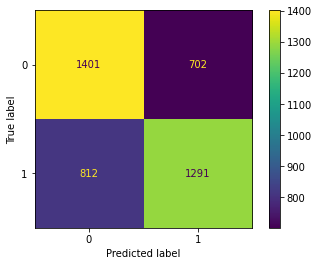

In [17]:
plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [18]:
acc_lr = accuracy_score(y_resampled, predictions) *100
rec_lr = recall_score(y_resampled, predictions, average='weighted')

In [19]:
print(matthews_corrcoef(y_resampled, predictions))

0.2804600056662167


In [20]:
print(geometric_mean_score(y_resampled, predictions))

0.6395034858295875


In [21]:
print(cohen_kappa_score(y_resampled, predictions))

0.280076081787922


# Support Vector Machine

*Classification Matrix for SVM: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2103
           1       0.98      0.95      0.96      2103

    accuracy                           0.96      4206
   macro avg       0.96      0.96      0.96      4206
weighted avg       0.96      0.96      0.96      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


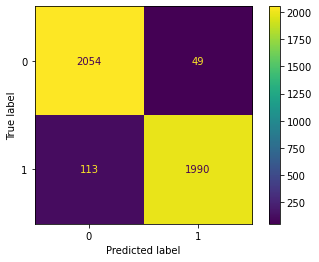

In [22]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_svc = accuracy_score(y_resampled, predictions) *100
rec_svc = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for SVM: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [23]:
print(matthews_corrcoef(y_resampled, predictions))

0.9233948899396407


In [24]:
print(geometric_mean_score(y_resampled, predictions))

0.9613631809339204


In [25]:
print(cohen_kappa_score(y_resampled, predictions))

0.9229671897289586


# Naive Bayes

*Classification Matrix for NB: 
              precision    recall  f1-score   support

           0       0.53      0.96      0.69      2103
           1       0.81      0.16      0.26      2103

    accuracy                           0.56      4206
   macro avg       0.67      0.56      0.47      4206
weighted avg       0.67      0.56      0.47      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


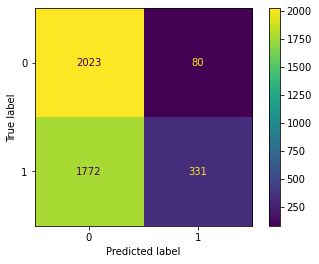

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_nb = accuracy_score(y_resampled, predictions) *100
rec_nb = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for NB: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [27]:
print(matthews_corrcoef(y_resampled, predictions))

0.20097725972273012


In [28]:
print(geometric_mean_score(y_resampled, predictions))

0.38911024496718705


In [29]:
print(cohen_kappa_score(y_resampled, predictions))

0.11935330480266282


# Random Forest

*Classification Matrix for RF: 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      2103
           1       0.68      0.60      0.64      2103

    accuracy                           0.66      4206
   macro avg       0.66      0.66      0.66      4206
weighted avg       0.66      0.66      0.66      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


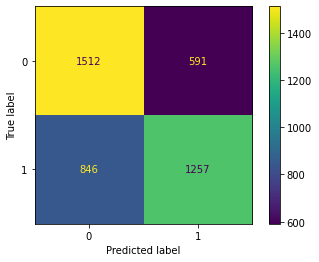

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_rf = accuracy_score(y_resampled, predictions) *100
rec_rf = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for RF: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [31]:
print(matthews_corrcoef(y_resampled, predictions))

0.31904456106021256


In [32]:
print(geometric_mean_score(y_resampled, predictions))

0.655547645267901


In [33]:
print(cohen_kappa_score(y_resampled, predictions))

0.31669044222539233


# OS-ELM

In [34]:
from pyoselm import OSELMClassifier

In [35]:
model = OSELMClassifier(n_hidden=20, activation_func='sigmoid', random_state=123)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_elm = accuracy_score(y_resampled, predictions) *100
rec_elm = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for OSELM: ")
print(classification_report(y_resampled, predictions))

*Classification Matrix for OSELM: 
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      2103
           1       0.62      0.62      0.62      2103

    accuracy                           0.62      4206
   macro avg       0.62      0.62      0.62      4206
weighted avg       0.62      0.62      0.62      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\pyoselm\layer.py:218: RuntimeWarning: overflow encountered in exp
  _sigmoid = lambda x: 1.0/(1.0 + np.exp(-x))
C:\Users\Public\Documents\anaconda\lib\site-packages\pyoselm\layer.py:218: RuntimeWarning: overflow encountered in exp
  _sigmoid = lambda x: 1.0/(1.0 + np.exp(-x))


In [36]:
print(matthews_corrcoef(y_resampled, predictions))

0.2415610148356448


In [37]:
print(geometric_mean_score(y_resampled, predictions))

0.6207776073716411


In [38]:
print(cohen_kappa_score(y_resampled, predictions))

0.2415596766524013


In [39]:
#plot_confusion_matrix(model, X_resampled, y_resampled)  
#plt.show()

# XGBoost

In [40]:
from xgboost import XGBClassifier

In [41]:
model = XGBClassifier(n_estimators=100)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_xgb = accuracy_score(y_resampled, predictions) *100
rec_xgb = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for XGB: ")
print(classification_report(y_resampled, predictions))

C:\Users\Public\Documents\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*Classification Matrix for XGB: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2103
           1       0.96      0.92      0.94      2103

    accuracy                           0.94      4206
   macro avg       0.94      0.94      0.94      4206
weighted avg       0.94      0.94      0.94      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


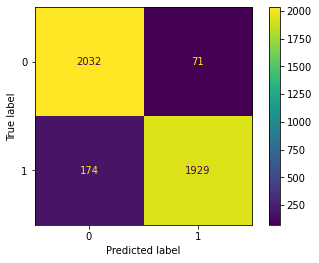

In [42]:
plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [43]:
print(matthews_corrcoef(y_resampled, predictions))

0.8845613466940981


In [44]:
print(geometric_mean_score(y_resampled, predictions))

0.9414314292713716


In [45]:
print(cohen_kappa_score(y_resampled, predictions))

0.8834997622444127


# Bagging Classifier

*Classification Matrix for Bagging: 
              precision    recall  f1-score   support

           0       0.54      0.94      0.68      2103
           1       0.76      0.20      0.31      2103

    accuracy                           0.57      4206
   macro avg       0.65      0.57      0.50      4206
weighted avg       0.65      0.57      0.50      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


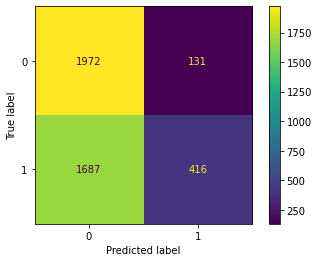

In [46]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_bc = accuracy_score(y_resampled, predictions) *100
rec_bc = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for Bagging: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [47]:
print(matthews_corrcoef(y_resampled, predictions))

0.20145126186516416


In [48]:
print(geometric_mean_score(y_resampled, predictions))

0.4306860924612544


In [49]:
print(cohen_kappa_score(y_resampled, predictions))

0.13552068473609125


# Boosting Classifier

*Classification Matrix for Boosting: 
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2103
           1       0.70      0.64      0.66      2103

    accuracy                           0.68      4206
   macro avg       0.68      0.68      0.68      4206
weighted avg       0.68      0.68      0.68      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


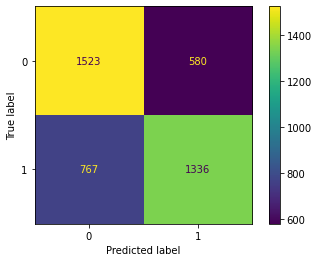

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_boost = accuracy_score(y_resampled, predictions) *100
rec_boost = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for Boosting: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [51]:
print(geometric_mean_score(y_resampled, predictions))

0.6782876474713081


In [52]:
print(matthews_corrcoef(y_resampled, predictions))

0.36091613835561187


In [53]:
print(cohen_kappa_score(y_resampled, predictions))

0.3594864479315264


# Gradient Boosting

*Classification Matrix for Gradient Boosting: 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2103
           1       0.70      0.67      0.68      2103

    accuracy                           0.69      4206
   macro avg       0.69      0.69      0.69      4206
weighted avg       0.69      0.69      0.69      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


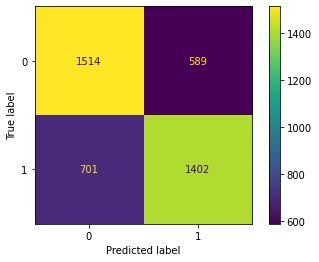

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_gb = accuracy_score(y_resampled, predictions) *100
rec_gb = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for Gradient Boosting: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [55]:
print(matthews_corrcoef(y_resampled, predictions))

0.38714000408077764


In [56]:
print(geometric_mean_score(y_resampled, predictions))

0.6927837171932175


In [57]:
print(cohen_kappa_score(y_resampled, predictions))

0.38659058487874465


# Voting Classifier

*Classification Matrix for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2103
           1       0.99      0.97      0.98      2103

    accuracy                           0.98      4206
   macro avg       0.98      0.98      0.98      4206
weighted avg       0.98      0.98      0.98      4206



C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


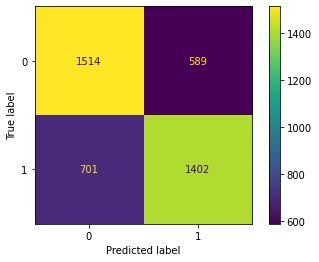

In [58]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

eclf1.fit(X_resampled, y_resampled)
predictions = eclf1.predict(X_resampled)
acc_vot = accuracy_score(y_resampled, predictions) *100
rec_vot = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [59]:
print(matthews_corrcoef(y_resampled, predictions))

0.9664599906476927


In [60]:
print(geometric_mean_score(y_resampled, predictions))

0.9830611345236513


In [61]:
print(cohen_kappa_score(y_resampled, predictions))

0.9662387066096053


# Stacking Classifier

C:\Users\Public\Documents\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Public\Documents\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Public\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


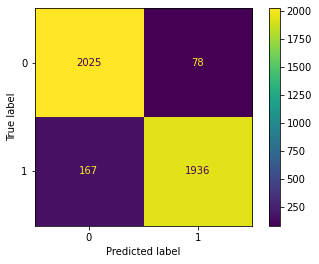

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = [('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)),
              ('XGBBoost',XGBClassifier(n_estimators=100))]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

model.fit(X_resampled, y_resampled)
predictions = model.predict(X_resampled)
acc_stack = accuracy_score(y_resampled, predictions) *100
rec_stack = recall_score(y_resampled, predictions, average='weighted')
print("*Classification Matrix for Stackiing Classifier: ")
print(classification_report(y_resampled, predictions))

plot_confusion_matrix(model, X_resampled, y_resampled)  
plt.show()

In [63]:
print(matthews_corrcoef(y_resampled, predictions))

0.8842920113592204


In [64]:
print(geometric_mean_score(y_resampled, predictions))

0.94151212553495


In [65]:
print(cohen_kappa_score(y_resampled, predictions))

0.8834997622444127


# Feed Forward NN

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=5)

In [68]:
model = Sequential()
# input layer requires input_dim param
model.add(Dense(10, input_dim=21, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
# sigmoid instead of relu for final probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [69]:
# call the function to fit to the data (training the network)
trained = model.fit(x_train, y_train, epochs=100, batch_size=10,
          validation_data=(x_validation, y_validation))

Epoch 1/100
295/295 [==============================] - 2s 6ms/step - loss: 230.6853 - accuracy: 0.5374 - val_loss: 9.8056 - val_accuracy: 0.5761
Epoch 2/100
295/295 [==============================] - 1s 4ms/step - loss: 96.1809 - accuracy: 0.5346 - val_loss: 51.8640 - val_accuracy: 0.5491
Epoch 3/100
295/295 [==============================] - 1s 4ms/step - loss: 110.9226 - accuracy: 0.5323 - val_loss: 114.7502 - val_accuracy: 0.5499
Epoch 4/100
295/295 [==============================] - 1s 5ms/step - loss: 22.2507 - accuracy: 0.5656 - val_loss: 2.5693 - val_accuracy: 0.5998
Epoch 5/100
295/295 [==============================] - 2s 6ms/step - loss: 8.9750 - accuracy: 0.5632 - val_loss: 6.7039 - val_accuracy: 0.6030
Epoch 6/100
295/295 [==============================] - 2s 6ms/step - loss: 10.1311 - accuracy: 0.5632 - val_loss: 2.8085 - val_accuracy: 0.6046
Epoch 7/100
295/295 [==============================] - 1s 4ms/step - loss: 9.7110 - accuracy: 0.5727 - val_loss: 3.6861 - val_accura

295/295 [==============================] - 1s 4ms/step - loss: 0.6596 - accuracy: 0.5965 - val_loss: 0.6724 - val_accuracy: 0.6014
Epoch 58/100
295/295 [==============================] - 2s 5ms/step - loss: 0.6598 - accuracy: 0.6036 - val_loss: 0.6655 - val_accuracy: 0.5951
Epoch 59/100
295/295 [==============================] - 1s 5ms/step - loss: 0.6571 - accuracy: 0.6012 - val_loss: 0.6678 - val_accuracy: 0.5864
Epoch 60/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6565 - accuracy: 0.6019 - val_loss: 0.7148 - val_accuracy: 0.6006
Epoch 61/100
295/295 [==============================] - 2s 8ms/step - loss: 0.6579 - accuracy: 0.6029 - val_loss: 0.6725 - val_accuracy: 0.5800
Epoch 62/100
295/295 [==============================] - 1s 5ms/step - loss: 0.6564 - accuracy: 0.6087 - val_loss: 0.6732 - val_accuracy: 0.6086
Epoch 63/100
295/295 [==============================] - 3s 10ms/step - loss: 0.6940 - accuracy: 0.5941 - val_loss: 0.6685 - val_accuracy: 0.5975
Epoc

In [70]:
scores = model.evaluate(X_resampled, y_resampled)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

132/132 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6472

accuracy: 64.72%


In [71]:
scores[1]

0.6471707224845886

In [72]:
predictions= model.predict(X_resampled)

In [73]:
predictions = predictions.astype(int)

In [74]:
rec_ffn = recall_score(y_resampled, predictions, average='weighted')

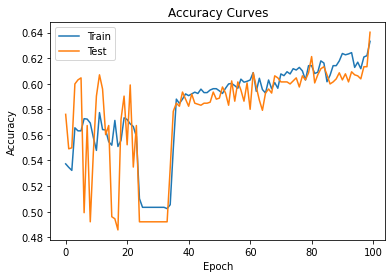

In [75]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

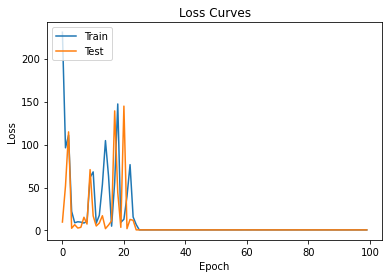

In [76]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Comparison

# Accuracy vs Recall

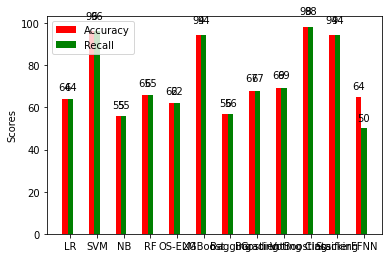

In [77]:
import numpy as np
import matplotlib.pyplot as plt

N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [acc_lr,acc_svc,acc_nb,acc_rf,acc_elm,acc_xgb,acc_bc,acc_boost,acc_gb,acc_vot,acc_stack,scores[1]*100]
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = [rec_lr*100,rec_svc*100,rec_nb*100,rec_rf*100,rec_elm*100,rec_xgb*100,rec_bc*100,rec_boost*100,rec_gb*100,rec_vot*100,rec_stack*100,rec_ffn*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( (') )
ax.legend( (rects1[0], rects2[0]), ('Accuracy', 'Recall') )'LR','SVM','NB','RF','OS-ELM','XGBoost','Bagging','Boosting','GradientBoosting','Voting Classifier','Stacking','FFNN

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()

# Accuracy

In [78]:
accuracies = [acc_lr,acc_svc,acc_nb,acc_rf,acc_elm,acc_xgb,acc_bc,acc_boost,acc_gb,acc_vot,acc_stack,scores[1]*100]

In [79]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]
    print(accuracies[i])

64.0038040893961
96.14835948644793
55.967665240133144
65.8345221112696
62.07798383262006
94.17498811222063
56.77603423680456
67.97432239657631
69.32952924393724
98.31193533048027
94.17498811222063
64.71707224845886


In [80]:
models = ['LR','SVM','NB','RF','OS-ELM','XGBoost','Bagging','Boosting','GradientBoosting','Voting Classifier','Stacking','FFNN']

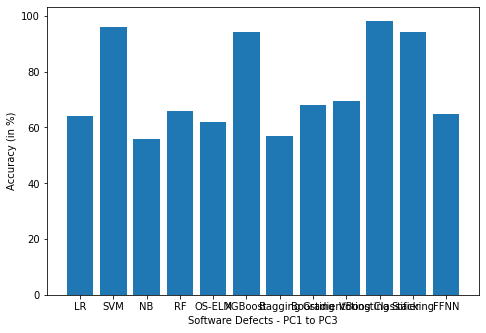

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracies)
plt.xlabel("Software Defects - PC1 to PC3")
plt.ylabel("Accuracy (in %)")
plt.show()

# Modelling

In [82]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']